# Star Wars films analysis
What I am trying to tackle in this document is determining the best Star Wars movies from the series basing on survey answers collected by FiveThirtyEight

Datasource: https://github.com/fivethirtyeight/data/tree/master/star-wars-survey

In [4]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [5]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [6]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [7]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [8]:
star_wars['RespondentID'].isnull().sum()

0

In [9]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                       

### Remapping 

In [10]:
responds = star_wars.iloc[0]

In [11]:
yesno = {"Yes": True, "No": False}
star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yesno)
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yesno)

In [12]:
star_wars.iloc[:,1].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
star_wars.iloc[:,2].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [14]:
import numpy as np
movie_map = {}
for i in range(3,9):
    movie_map[star_wars.iloc[0,i]] = True
movie_map[np.NaN] = False

movie_map_col = {}
for i in range(3,9):
    movie_map_col[star_wars.columns[i]] = 'seen_'+str(i-2)

In [15]:
star_wars.iloc[0:,3:9] = star_wars.iloc[0:,3:9].replace(movie_map)

In [16]:
star_wars = star_wars.rename(columns=movie_map_col)

In [17]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [18]:
ranking_map_col = {}
for i in range(1,7):
    ranking_map_col[star_wars.columns[i+8]] = 'ranking_'+str(i)
star_wars = star_wars.rename(columns=ranking_map_col)
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

In [19]:
ranking = 7-star_wars[["ranking_"+str(i) for i in range(1,7)]] #best =1, worst = 6 hence inversion
ranking_mean = ranking.mean()

In [20]:
ranking_mean = ranking_mean.rename("survey")

In [21]:
ranking_mean

ranking_1    3.267066
ranking_2    2.912679
ranking_3    2.658683
ranking_4    3.727273
ranking_5    4.486842
ranking_6    3.952153
Name: survey, dtype: float64

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

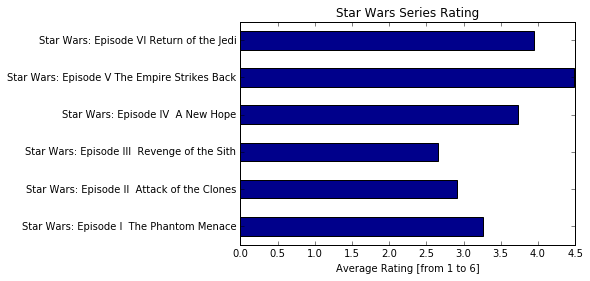

In [23]:
ranking_mean_ax = ranking_mean.plot(kind='barh', color="darkblue")
ranking_mean_ax.set_yticklabels(responds[3:9])
ranking_mean_ax.set_title("Star Wars Series Rating")
ranking_mean_ax.set_xlabel("Average Rating [from 1 to 6]")

plt.show()

Best rated Star Wars part was part 5 and the worst rated is part 3. Part 4, 5 and 6 that were released before are better rated than 1 to 3 that are newer.

In [24]:
seen = star_wars[["seen_"+str(i) for i in range(1,7)]] 
seen_sum = seen.sum()

In [25]:
seen_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

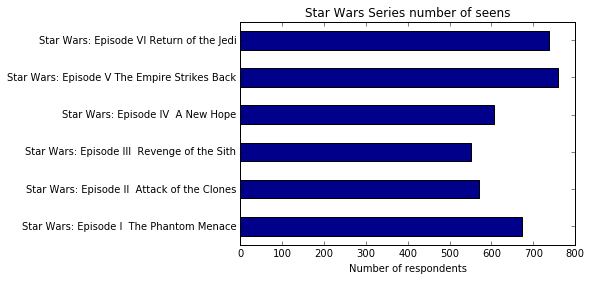

In [26]:
ax = seen_sum.plot(kind='barh', color="darkblue")
ax.set_yticklabels(responds[3:9])
ax.set_title("Star Wars Series number of seens")
ax.set_xlabel("Number of respondents")

plt.show()


Similarly to ratings, here the 'old series' overally has more views.

### The old series
- The first Star Wars movie Episode IV A New Hope was seen by 607 respondents and rated 2.72
- Next in order of release date, Episode V was seen by 758 people and rated 3.49 (best of all!)
- Closing the old era, Episode VI was watched by 738 viewers and rated 2.95

### The new series
- First in new series, released in 1999 and showing the universe from the beginning, Episode 1 was watched by 673 and rated 2.27
- Episode II was seen by 571 respondents and rated 1.91
- Last and the least, Episode III watched by just 550 fans and rated 1.66

## Comparing survey results with IMDB database
IMDB is an online movies webpage where users can vote, comment and find informations about films. It is visited by thousands of users every day and so we can set up our outcomes with this database to have an idea weather they converge

In [27]:
# scraped from IMDB webpage manually on 19.02.2020
imdb_rating = pd.Series(index=["ranking_"+str(i) for i in range(1,7)], data=[6.5, 6.5, 7.9, 8.6, 8.7, 8.3], name="IMDB")

In [28]:
imdb_rating = (imdb_rating/10)*6-2 # normalization to 1-6 scale and dodgeing by 2
overall_rank = pd.concat([ranking_mean, imdb_rating], axis=1)

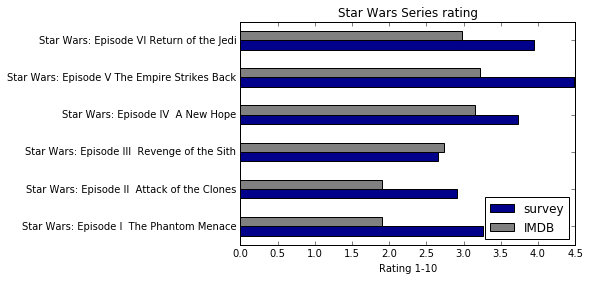

In [29]:
ax1 = overall_rank.plot(kind='barh', color=["darkblue","grey"])
ax1.set_yticklabels(responds[3:9])
ax1.set_title("Star Wars Series rating")
ax1.set_xlabel("Rating 1-10")

plt.show()

Overlaying normalized IMDB scores of Star Wars series brings some new insights. What applies for both series is that overall old series is reviewed better than the new one.
However, there are several differences among particular episodes. Mostly vivid in case of Episode III wich is appreciated by IMDB users but not by survey participants.

Such discrepancies might be caused by several factors.
- First of all survey participants were asked to rank episodes in a rank. That means that in survey ranking movie that received lowest rank does not have to be really bad, it is just worst of the series. On IMDB same movie can deserve rank of 7 or more (on 1-10 scale)
- Secondly analyzed set of survey was answered by 1,186 respondents. Episode IV of Star Wars received votes from over 1 mln users on IMDB. Also we have not analyzed the population and how biased is it among both sources.

# Star Wars vs Star Trek Fandom

In [30]:
star_wars["star_wars_fan"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]
star_wars["star_trek_fan"] = star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].map(yesno)

In [31]:
fandom_sw = star_wars.groupby(['star_wars_fan']).mean()
fandom_st = star_wars.groupby(['star_trek_fan']).mean()

In [32]:
rank_fandom_sw = 7 - fandom_sw[["ranking_"+str(i) for i in range(1,7)]].T
rank_fandom_st = 7 - fandom_st[["ranking_"+str(i) for i in range(1,7)]].T

In [33]:
rank_fandom_sw

star_wars_fan,False,True
ranking_1,4.063604,2.858696
ranking_2,3.408451,2.657609
ranking_3,2.806338,2.582577
ranking_4,3.066901,4.067029
ranking_5,4.137324,4.666667
ranking_6,3.528169,4.170290


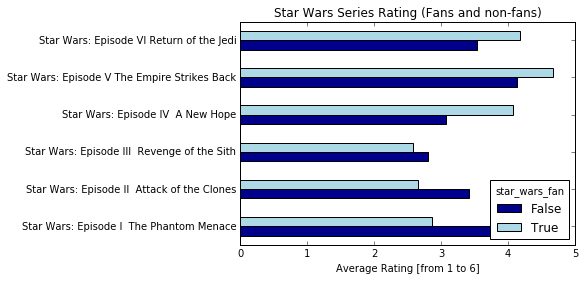

In [34]:
ax = rank_fandom_sw.plot(kind='barh', color=["darkblue","lightblue"])
ax.set_yticklabels(responds[3:9])
ax.set_title("Star Wars Series Rating (Fans and non-fans)")
ax.set_xlabel("Average Rating [from 1 to 6]")

plt.show()

Those who name themselved fans of Star Wars have slightly different stats to non-fans. The ranking is skewed towards older series while non-fans prefer the newer versions. 
It might be an derivative of film production year and hence technology. Movies created before 2000, especially sci-fi with a lot of special effects might be sometimes hard or even funny to watch. Cinemans used to the newest computer renders might not enjoy poor and cheap looking (nowadays) effects. The real fans though, focus rather more on the plot and the story, not bothered but an outdated footage.

In [35]:
rank_fandom_st

star_trek_fan,False,True
ranking_1,3.512136,3.031325
ranking_2,3.084746,2.744578
ranking_3,2.721550,2.596618
ranking_4,3.566586,3.889157
ranking_5,4.365617,4.592771
ranking_6,3.755448,4.149398


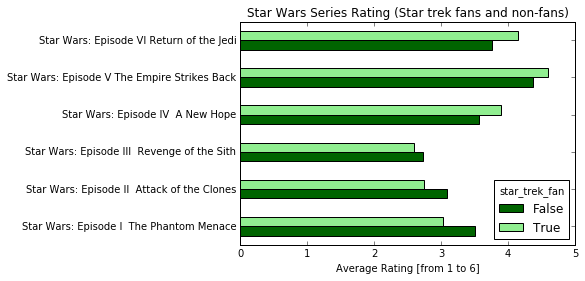

In [36]:
ax = rank_fandom_st.plot(kind='barh', color=["darkgreen","lightgreen"])
ax.set_yticklabels(responds[3:9])
ax.set_title("Star Wars Series Rating (Star trek fans and non-fans)")
ax.set_xlabel("Average Rating [from 1 to 6]")

plt.show()

Another big group, a Star Trek fans. Among those stats are also in favor of the old movies. Not so surprising, as all original Star Trek movies were released between 1979 and 1991 so in the very same time that Episode 4 to 6 of Star Wars.

Perhaps the next step would be to analyze sociodemographic part of the survey and discover how do the ratings look like among different age groups. Do older generation have a sentiment to the movies released at their youths? Do young people like old style Episodes produced before they were born?